#### 4) aumento/disminucion del acumulado de precios a traves de los años en Mexico DF.

In [2]:
%matplotlib inline

import math
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot  as plt

from datetime import datetime

pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
# Creamos el dataframe y le asignamos como id del dataframe, el id de cada row del csv.
df = pd.read_csv('train_transformed.csv', index_col='id')

In [5]:
df4 = df.copy()

df4 = df4.loc[df.provincia == 'distrito federal']
df4 = df4[['precio','fecha']]
df4.dropna(inplace= True)
df4['fecha'] = df4['fecha'].apply(func = (lambda x :(datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))))

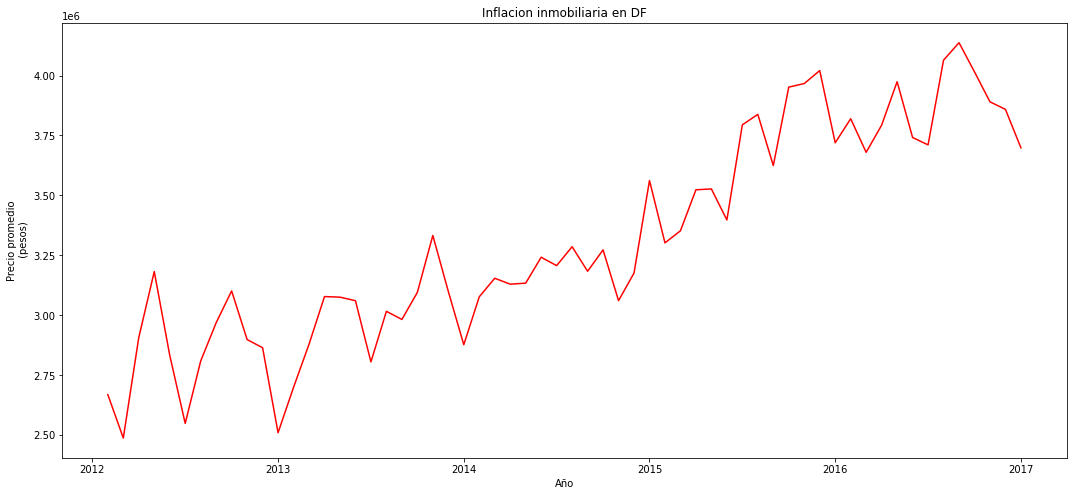

In [6]:
#plt.
df_by_months = df4['fecha'].apply(func = (lambda t : (t.year-2012)*12+t.month))
df4.groupby(df_by_months).precio.mean().plot(c='r',linewidth =1.5, figsize = [18,8])

plt.title('Inflacion inmobiliaria en DF')
plt.xticks(np.arange(0,61,12),np.arange(2012,2018,1))
plt.xlabel('Año')
plt.ylabel('Precio promedio\n (pesos)')

plt.show()

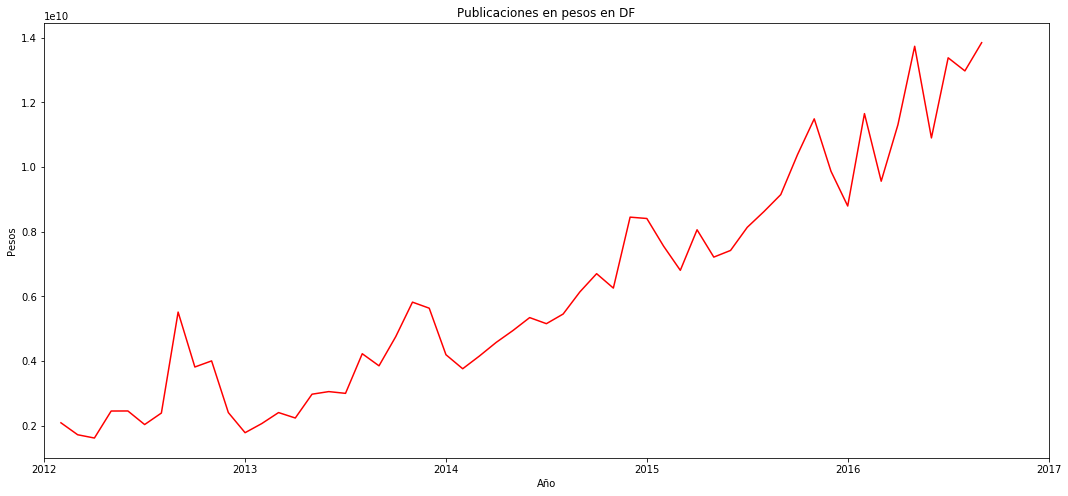

In [60]:
#plt.
df_by_months = df4['fecha'].apply(func = (lambda t : (t.year-2012)*12+t.month))
df4.groupby(df_by_months).precio.sum().plot(c='r',linewidth =1.5, figsize = [18,8])

plt.title('Publicaciones en pesos en DF')
plt.xticks(np.arange(0,61,12),np.arange(2012,2018,1))
plt.xlabel('Año')
plt.ylabel('Sumatoria Pesos')

plt.show()

In [12]:
df4 = df.copy()

df4 = df4[['precio','fecha', 'provincia']]
df4.dropna(inplace= True)
df4['fecha'] = df4['fecha'].apply(func = (lambda x :(datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))))
aux = df4.fecha.apply(lambda x: x.month < 9 if x.year == 2016 else True)
df4 = df4[aux]

In [13]:
df_by_months = df4['fecha'].apply(func = (lambda t : (t.year-2012)*12+t.month))

fiveLargest = list(df4.groupby(df4.provincia).precio.sum().nlargest(5).index)
df4 = df4[df4.provincia.isin(fiveLargest)]

In [14]:
#
# https://stackoverflow.com/questions/4805048/how-to-get-different-colored-lines-for-different-plots-in-a-single-figure
#

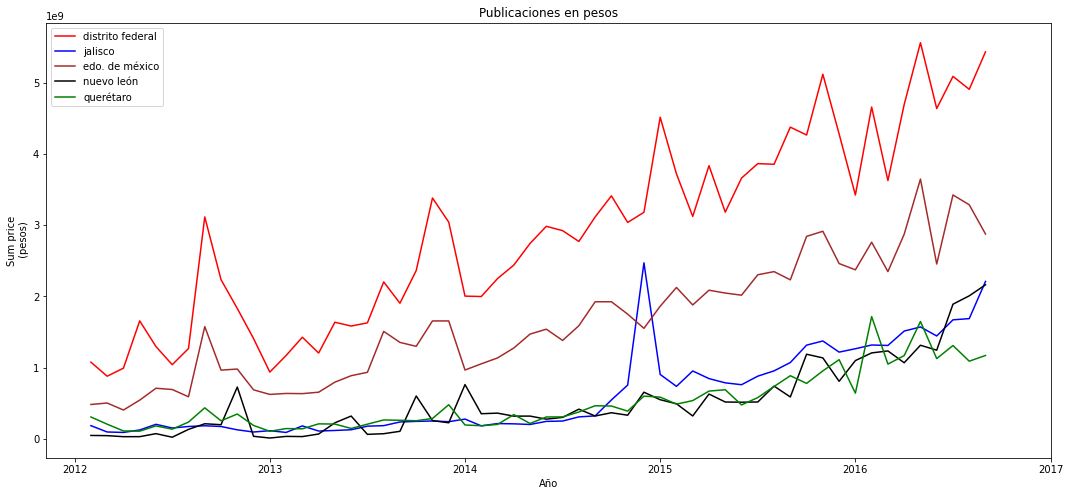

In [16]:
# CON ESTA FORMA NO PUEDO IR CAMBIANDO EL VALOR DE 'c' PARA IR ELIGIENDO EL COLOR
#
#df4.groupby(df4.provincia).\
#apply(lambda x: x.groupby(df_by_months).precio.sum().\
#plot(c='r',linewidth =1, figsize = [18,8]))
#

colors = ['red','blue','brown','black','green']
for prov in df4.provincia.unique():
        df4.loc[df4.provincia == prov].groupby(df_by_months).precio.sum().plot(c=colors.pop(0), linewidth=1.5, figsize = [18,8])

plt.title('Publicaciones en pesos')
plt.xticks(np.arange(0,61,12),np.arange(2012,2018,1))
plt.xlabel('Año')
plt.ylabel('Sum price\n (pesos)')
plt.legend(df4.provincia.unique())

plt.show()